# Title: Machine Learning
# Author: Kamalini Pradhan
# [GIthub link](https://github.com/S573647/datafun-07-ML)

## Import All the Libraries needed 

In [9]:
# Standard library imports
import os
import sys

# Third-party library imports
import numpy as np
import pandas as pd
import pyarrow
import matplotlib
import seaborn
import scipy

# Part 1: Chart a Straight Line

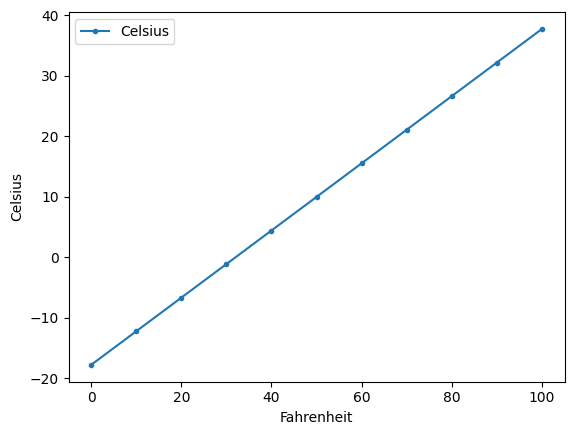

In [3]:
import pandas as pd

c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Part 2: Predict Avg High Temp in NYC in January

## Section 1 - Data Acquisition 
### Loading the Average High Temperature in NYC in Jan  data into a DataFrame

In [24]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Section 2 - Data Inspection

In [25]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3 - Data Cleaning

In [26]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)


,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


### Truncate the last two digits of the date column

In [27]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4 - Descriptive Statistics
### Calculating Basic Descriptive Statistics for the Dataset

In [37]:
pd.set_option('display.float_format', '{:.2f}'.format)
nyc_df.describe()

,Date,Temperature,Anomaly
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


## Section 5 - Build the Model

In [39]:
from scipy import stats
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)
linear_regression.slope
linear_regression.intercept

8.694993233674289

### Forecasting Future January Average High Temperatures

In [40]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

## Section 7 - Visualizations
### Plotting the Average High Temperatures and a Regression Line

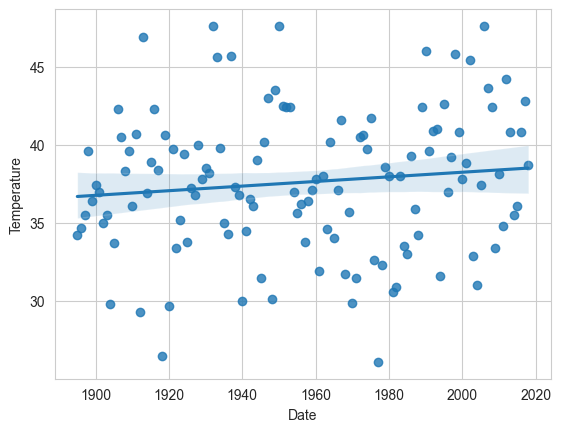

In [41]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
